 # Лабораторная работа 1.

### Основные понятия математической статистики. Вариационный ряд. Эмпирическая функция распределения.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable

*Согласно заданию типового расчета определена выборка случайных величин  Y = f(xᵢ), где Xᵢ - равномерно распределенное число из заданного интервала [a, b], i = 1, ...n.*

In [3]:
a = -2
b = 2

def Y(x):
    return x*x

*Задание величины n (объем выборки).*

In [5]:
n = int(input("Enter n. "))

Enter n. 50


*Формирование выборки случайных величин Y путем получения равномерно распределенного числа Ƹ из интервала [0, 1] и его преобразования в число Xᵢ, имеющее равномерное распределение из требуемого интервала [a, b], по формуле Xᵢ = Ƹᵢ*(b-a) + a:*

In [6]:
eps = [np.random.uniform(0, 1) for i in range(n)]
x = [(ei*(b-a) + a) for ei in eps]
y = [Y(xi) for xi in x]

*Построение вариационного ряда для полученной случайной величины:*

In [7]:
variation = sorted(y)

*В аналитическом виде была получена теоретическая функция распределения СВ:*

In [8]:
def F(y):
    return y**0.5/2

*Построение эмпирической функции распределения СВ, ее изображение в виде графика и таблицы, а также представление графика теоретической функции распределения в одном окне:*

In [9]:
def find_borders():
    ay = Y(a)
    by = Y(b)
    xes = np.arange(a, b + 0.001, 0.001)
    for x in xes:
        ay = min(ay, Y(x))
        by = max(by, Y(x))
    ay = round(ay, 2)
    by = round(by, 2)
    return ay, by


def emp_theor_graphics(ay, by, variation):
    hi = (by - ay) / n
    h_start = [hi*i for i in range(n)]
    h_end = [h + hi for h in h_start]
    f_emp = [len([v for v in variation if v <= hi])/n for hi in h_end]
    plt.subplot(1, 2, 1)
    plt.hlines(f_emp, h_start, h_end, color='red')
    plt.xlim(ay, by)
    plt.title("Эмпирическая функция\n распределения")
    plt.subplot(1, 2, 2)
    arg_list = np.arange(ay, by, 0.001)
    func_theor = [F(x) for x in arg_list]
    plt.plot(arg_list, func_theor, color='blue')
    plt.xlim(ay, by)
    plt.title("Теоретическая функция\n распределения")
    plt.grid()
    plt.show()
    return h_start, h_end, f_emp

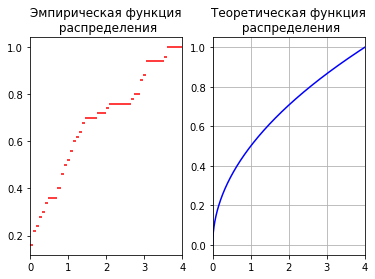

Empirical function
+-----------------+-------+
|     Interval    | f emp |
+-----------------+-------+
| 0.0000 : 0.0800 |  0.16 |
| 0.0800 : 0.1600 |  0.22 |
| 0.1600 : 0.2400 |  0.24 |
| 0.2400 : 0.3200 |  0.28 |
| 0.3200 : 0.4000 |  0.3  |
| 0.4000 : 0.4800 |  0.34 |
| 0.4800 : 0.5600 |  0.36 |
| 0.5600 : 0.6400 |  0.36 |
| 0.6400 : 0.7200 |  0.36 |
| 0.7200 : 0.8000 |  0.4  |
| 0.8000 : 0.8800 |  0.46 |
| 0.8800 : 0.9600 |  0.5  |
| 0.9600 : 1.0400 |  0.52 |
| 1.0400 : 1.1200 |  0.56 |
| 1.1200 : 1.2000 |  0.6  |
| 1.2000 : 1.2800 |  0.62 |
| 1.2800 : 1.3600 |  0.64 |
| 1.3600 : 1.4400 |  0.68 |
| 1.4400 : 1.5200 |  0.7  |
| 1.5200 : 1.6000 |  0.7  |
| 1.6000 : 1.6800 |  0.7  |
| 1.6800 : 1.7600 |  0.7  |
| 1.7600 : 1.8400 |  0.72 |
| 1.8400 : 1.9200 |  0.72 |
| 1.9200 : 2.0000 |  0.72 |
| 2.0000 : 2.0800 |  0.74 |
| 2.0800 : 2.1600 |  0.76 |
| 2.1600 : 2.2400 |  0.76 |
| 2.2400 : 2.3200 |  0.76 |
| 2.3200 : 2.4000 |  0.76 |
| 2.4000 : 2.4800 |  0.76 |
| 2.4800 : 2.5600 |  0.76 |
|

In [10]:
ay, by = find_borders()
start, end, f_emp = emp_theor_graphics(ay, by, variation)
print("Empirical function")
f_emp_table = PrettyTable()
f_emp_table.field_names = ["Interval", "f emp"]
for i in range(len(f_emp)):
    f_emp_table.add_row(["%.4f" % start[i] + " : " + "%.4f" % end[i], f_emp[i]])
print(f_emp_table)